# Exploring The World Development Indicators 

This project is based on [The World Development Indicators database (WDI)](https://databank.worldbank.org/home). The database contains a collection of thousands of development indicators from 247 countries all around the world, for example: currency, government accounting concept, income group, adolescent fertility rate, food exports, etc.


The database was last updated on May 28th, 2020.


In [58]:
import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#Establish connection with the database
conn = sqlite3.connect('C://Users//Leehee//Desktop//python//EDA//database.sqlite')


## Getting to Know the Database

In [4]:
#Get tables names
  
get_tables_names = conn.execute("SELECT name FROM sqlite_master WHERE type='table';")
for name in get_tables_names:
    print(name[0])

Country
CountryNotes
Series
Indicators
SeriesNotes
Footnotes


In [79]:
#Get info from the main table
for c in conn.execute("PRAGMA table_info(country)"):
    print(c)

(0, 'CountryCode', 'TEXT', 0, None, 0)
(1, 'ShortName', 'TEXT', 0, None, 0)
(2, 'TableName', 'TEXT', 0, None, 0)
(3, 'LongName', 'TEXT', 0, None, 0)
(4, 'Alpha2Code', 'TEXT', 0, None, 0)
(5, 'CurrencyUnit', 'TEXT', 0, None, 0)
(6, 'SpecialNotes', 'TEXT', 0, None, 0)
(7, 'Region', 'TEXT', 0, None, 0)
(8, 'IncomeGroup', 'TEXT', 0, None, 0)
(9, 'Wb2Code', 'TEXT', 0, None, 0)
(10, 'NationalAccountsBaseYear', 'TEXT', 0, None, 0)
(11, 'NationalAccountsReferenceYear', 'TEXT', 0, None, 0)
(12, 'SnaPriceValuation', 'TEXT', 0, None, 0)
(13, 'LendingCategory', 'TEXT', 0, None, 0)
(14, 'OtherGroups', 'TEXT', 0, None, 0)
(15, 'SystemOfNationalAccounts', 'TEXT', 0, None, 0)
(16, 'AlternativeConversionFactor', 'TEXT', 0, None, 0)
(17, 'PppSurveyYear', 'TEXT', 0, None, 0)
(18, 'BalanceOfPaymentsManualInUse', 'TEXT', 0, None, 0)
(19, 'ExternalDebtReportingStatus', 'TEXT', 0, None, 0)
(20, 'SystemOfTrade', 'TEXT', 0, None, 0)
(21, 'GovernmentAccountingConcept', 'TEXT', 0, None, 0)
(22, 'ImfDataDissemina

In [6]:
#Get all tables as a df
pd.read_sql(""" SELECT type,name,rootpage
                FROM sqlite_master
                WHERE type='table';""",
           conn)

,type,name,rootpage
0,table,Country,2
1,table,CountryNotes,186
2,table,Series,948
3,table,Indicators,4448
4,table,SeriesNotes,1317550
5,table,Footnotes,1317587


## Exploring The Indicatrs Table

In [7]:
#Get the indicators table as a dataframe
pd.read_sql(""" SELECT * FROM indicators LIMIT 5;""", conn)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [8]:
#Get all unique indicators 
pd.read_sql(""" SELECT distinct indicatorname FROM indicators; """, conn)


#List of countries names
pd.read_sql(""" SELECT countryname, count(countryname) FROM indicators GROUP BY countryname; """, conn)
#Number of countries
pd.read_sql(""" SELECT count(distinct countryname) totalCountries FROM indicators; """, conn)



,totalCountries
0,247


In [9]:
#Check for NULL values
pd.read_sql(""" SELECT count(*) - count(countryname) missing_country_name,
                       count(*) - count(countrycode) missing_country_code,
                       count(*) - count(indicatorname) missing_indicatorname,
                       count(*) - count(year) missing_year
                    FROM indicators; """, conn)


,missing_country_name,missing_country_code,missing_indicatorname,missing_year
0,0,0,0,0


In [10]:
#Get country with most info
pd.read_sql(""" SELECT countryname, count(distinct indicatorname) numberOfuniqueIndicators
                    FROM indicators 
                    GROUP BY countryname
                    ORDER BY numberOfuniqueIndicators DESC
                    LIMIT 1; """, conn)



,CountryName,numberOfuniqueIndicators
0,Bolivia,1307


There are 247 countries in the dataframe, describing 1344 development indicators. There are no missing values.
Bolivia has the most indicators with 1,307 different indictaros.


## Which Country Has the Highets Survival to 65y/o rate?

In [27]:
#Females - top 10 countries with highest survival rate
pd.read_sql(""" SELECT countryname, avg(value) as avg_survival65_female
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, female (% of cohort)'
                    GROUP BY countryname
                    ORDER BY avg_survival65_female DESC
                    LIMIT 10;""", conn)

#Females - bottom 10 countries with lowest survival rate
pd.read_sql(""" SELECT countryname, avg(value) as avg_survival65_female
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, female (% of cohort)'
                    GROUP BY countryname
                    ORDER BY avg_survival65_female ASC
                    LIMIT 10;""", conn)

#Males - top 10 countries with highest survival rate
pd.read_sql(""" SELECT countryname, avg(value) as avg_survival65_male
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, male (% of cohort)'
                    GROUP BY countryname
                    ORDER BY avg_survival65_male DESC
                    LIMIT 10;""", conn)

#Males - bottom 10 countries with lowest survival rate
pd.read_sql(""" SELECT countryname, avg(value) as avg_survival65_male
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, male (% of cohort)'
                    GROUP BY countryname
                    ORDER BY avg_survival65_male ASC
                    LIMIT 10;""", conn)

,CountryName,avg_survival65_male
0,Sierra Leone,26.724106
1,Eritrea,29.941574
2,Angola,30.038119
3,South Sudan,31.710769
4,Mozambique,32.200426
5,Rwanda,33.123776
6,Central African Republic,33.518350
7,Malawi,34.509180
8,Nigeria,34.710914
9,Chad,34.763499


In [80]:
#Females - Israel's survival rate over the years
pd.read_sql(""" SELECT countryname, year, value as survival65_female
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, female (% of cohort)' and countrycode='ISR' 
                    GROUP BY countryname,year
                    ORDER BY survival65_female asc
;""", conn)



#Males - Israel's survival rate over the years
pd.read_sql(""" SELECT countryname, year, value as survival65_male
                    FROM indicators 
                    WHERE indicatorname = 'Survival to age 65, male (% of cohort)' and countrycode='ISR' 
                    GROUP BY countryname,year
                    ORDER BY survival65_male asc
                    LIMIT 5
;""", conn)



,CountryName,Year,survival65_male
0,Israel,1960,72.43785
1,Israel,1961,72.68368
2,Israel,1962,72.92951
3,Israel,1963,73.13459
4,Israel,1964,73.33966


In [13]:
#Females - Israel's survival chart over the years, 1960 - 2013
print(pd.read_sql("""SELECT countryName, year, min(value), max(value), max(value) - min(value) increased_survival_percentages_female
               FROM indicators
               WHERE indicatorName = 'Survival to age 65, female (% of cohort)'
               and countrycode = 'ISR';""", conn))


#Males - Israel's survival chart over the years, 1960 - 2013
print(pd.read_sql("""SELECT countryName, year, min(value), max(value), max(value) - min(value) increased_survival_percentages_male
               FROM indicators
               WHERE indicatorName = 'Survival to age 65, male (% of cohort)'
               and countrycode = 'ISR';""", conn))

  CountryName  Year  min(value)  max(value)  \
0      Israel  2013    78.25603    93.10509   

   increased_survival_percentages_female  
0                               14.84906  
  CountryName  Year  min(value)  max(value)  \
0      Israel  2013    72.43785    88.10794   

   increased_survival_percentages_male  
0                             15.67009  


Sweden has the highest survival to 65 y/o rate, with an average of 88.8 years for females, and 81.35 for males.
Sierra Leone presents the lowest survial rate, with 28.4 years for female and 26.7 years for males.
This is an average rate over all the years of the cohort.


Israel's survival rate increased every year, between the years 1960 and 2013.
The survival rate increased by 19% for women and by 21% for males, and as for 2013 it is 93.1 years for females, and 88.1 years for males.

## Which country has the highest adolescent fertility rate?

Is this section, I will query for the country with the highest adolescent fertility rate, with is calucluated by the number of births per 1,000 women ages 15-19, during the 2000's.



In [14]:
#Global
pd.read_sql(""" SELECT avg(value) global_adolescent_fertility_rate_1960_1970
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and year between 1960 and 1970 
                ;""",conn)

pd.read_sql(""" SELECT avg(value) global_adolescent_fertility_rate_2000_2010
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and year between 2000 and 2010 
                ;""",conn)



,global_adolescent_fertility_rate_2000_2010
0,56.857412


In [24]:
#Per country
fertility_rate = pd.read_sql(""" SELECT countryname, avg(value) adolescent_fertility_rate
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and year between 2000 and 2010 
                GROUP BY countryname
                ORDER BY adolescent_fertility_rate
                ;""",conn)

print(fertility_rate.head(), "\n",
fertility_rate.tail())


            CountryName  adolescent_fertility_rate
0      Korea, Dem. Rep.                   0.802873
1           Korea, Rep.                   2.150073
2  Hong Kong SAR, China                   3.494564
3      Macao SAR, China                   3.829527
4           Switzerland                   4.793000 
     CountryName  adolescent_fertility_rate
222  Mozambique                 177.329436
223        Mali                 182.169855
224        Chad                 191.645473
225      Angola                 195.736218
226       Niger                 214.840436


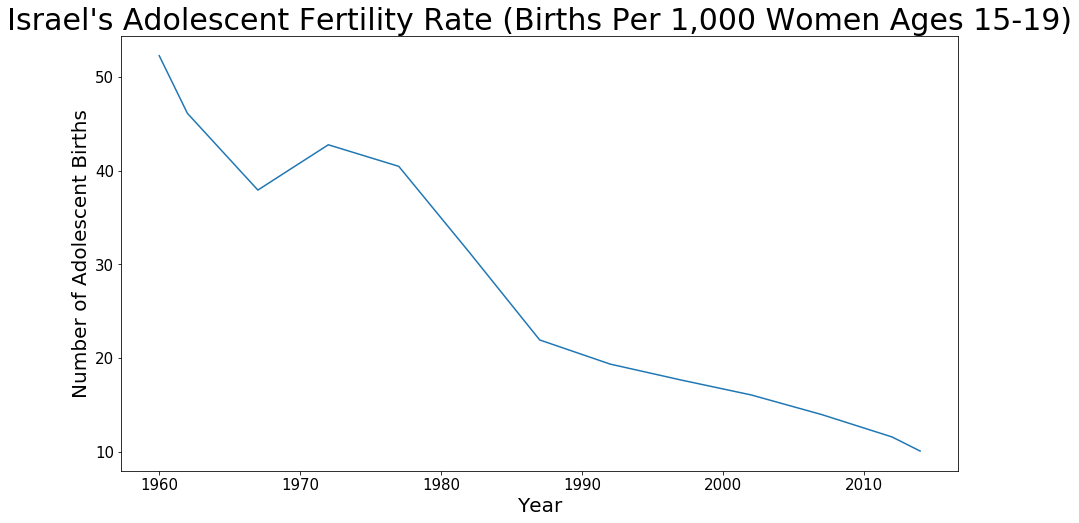

In [72]:
#Israel's adolescent fertility rate - total average
pd.read_sql(""" SELECT countryname, avg(value) adolescent_fertility_rate
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and year between 2000 and 2010 and countrycode = 'ISR'
                GROUP BY countryname
                ;""",conn)

#Israel's adolescent fertility rate - grouped by year
isr_fr = pd.read_sql(""" SELECT countryname, year, value adolescent_fertility_rate
                FROM indicators
                WHERE indicatorname= 'Adolescent fertility rate (births per 1,000 women ages 15-19)'
                and countrycode = 'ISR'
                GROUP BY countryname, year
                ;""",conn)


plt.figure(figsize=(15,8))
isr_fr_plot = sns.lineplot(x="Year",  y="adolescent_fertility_rate", data=isr_fr)
isr_fr_plot.set_title("Israel's Adolescent Fertility Rate (Births Per 1,000 Women Ages 15-19)",fontsize=30)
isr_fr_plot.set_xlabel('Year', fontsize=20)
isr_fr_plot.set_ylabel('Number of Adolescent Births', fontsize=20)
isr_fr_plot.tick_params(labelsize=15)



The global adolescent fertility rate during the 2000's is 56.8 per 1000 births. Countries in Africa has the highest adolescent fertility rate (214/1000 in Niger), while Korea has the lowest (0.8/1000).

Israel's adolescent fertility rate from 2000 to 2010 is on overage 14.7 births per 1000 women. 
The number of asolescent birth is consistently decreasing since 1960, except for an increase during 1969-1973, could be due to political conflicts, the war of Attrition and the Yum Kipur war.
